In [1]:

import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import textblob
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
import patsy

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [3]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
country_code=pd.read_csv('country_codes_final.csv',error_bad_lines=False)

In [4]:
# clean_votes['country'].unique()

In [5]:
# country_code['country']=country_code['country'].apply(lambda x: x.upper())
# country_code.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART2/country_codes_capital.csv", index=False)

In [6]:
category['country'].nunique()

201

In [7]:
# category.info()

In [8]:
data2=pd.merge(category,country_code, on=['country']);
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551784 entries, 0 to 551783
Data columns (total 10 columns):
symbol      551784 non-null object
title       551784 non-null object
descr1      551784 non-null object
category    551784 non-null object
year        551784 non-null int64
voted       551784 non-null object
country     551784 non-null object
date        551784 non-null object
a2          551784 non-null object
a3          551784 non-null object
dtypes: int64(1), object(9)
memory usage: 46.3+ MB


In [9]:
data2['country'].nunique()

197

In [10]:
# armenia=data2[data2['country']=="ARMENIA"]

# armenia['year'].unique()

In [11]:
def coded_voted(voted):
    for x in voted:
        if voted=='Y':
            return 1
        if voted=='N':
            return -1
        if voted =='A':
            return 0
        
data2['code_vote']=data2['voted'].map(coded_voted)

In [12]:
data2['code_vote'].value_counts()

 1    459101
 0    64432 
-1    28251 
Name: code_vote, dtype: int64

In [13]:
data1=data2.query('category == ["Law of the sea","Decolonization","Nuclear Disarmament","Universal Human Rights","Middle East","Arm Race in Space","Racial Discrimination"]')

In [14]:
data1['country'].nunique()

197

# CLUSTER BEFORE 1991

In [15]:
data0=data1[data1['year']<1991]

data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 551359
Data columns (total 11 columns):
symbol       116137 non-null object
title        116137 non-null object
descr1       116137 non-null object
category     116137 non-null object
year         116137 non-null int64
voted        116137 non-null object
country      116137 non-null object
date         116137 non-null object
a2           116137 non-null object
a3           116137 non-null object
code_vote    116137 non-null int64
dtypes: int64(2), object(9)
memory usage: 10.6+ MB


In [16]:
data=data0[['country', 'code_vote','symbol','year']]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 551359
Data columns (total 4 columns):
country      116137 non-null object
code_vote    116137 non-null int64
symbol       116137 non-null object
year         116137 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.4+ MB


In [17]:
data['country'].nunique()

159

In [18]:
df=data.groupby(['country', 'symbol'])['code_vote'].aggregate('mean').unstack()
df.reset_index()

symbol,country,A/RES/35/118,A/RES/35/119,A/RES/35/120,A/RES/35/122A,A/RES/35/122B,A/RES/35/122C,A/RES/35/122D,A/RES/35/122E,A/RES/35/122F,...,A/RES/45/96,A/RES/ES-7/2,A/RES/ES-7/3,A/RES/ES-7/4,A/RES/ES-7/5,A/RES/ES-7/6,A/RES/ES-7/7,A/RES/ES-7/8,A/RES/ES-7/9,A/RES/ES-9/1
0,AFGHANISTAN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,ALBANIA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,ALGERIA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,ANGOLA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,ANTIGUA AND BARBUDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARGENTINA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
6,AUSTRALIA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0
7,AUSTRIA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,0.0,1.0,0.0
8,BAHAMAS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
9,BAHRAIN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, AFGHANISTAN to ZIMBABWE
Columns: 796 entries, A/RES/35/118 to A/RES/ES-9/1
dtypes: float64(796)
memory usage: 990.0+ KB


In [20]:
d=df.copy()

d['missing']=d.apply(lambda x: x.count(), axis=1)

d['missing_diff']=d['missing'].apply(lambda x: (x-796))

d['missing_diff'].sum()/(796*159)

-0.09783982807117347

In [21]:
# df['missing']

In [22]:
# data_missing=df[df['missing']>300]

# data_missing['missing_diff'].sum()/(859*159)

In [23]:
X=df.as_matrix().astype(float)

In [24]:
X_incomplete = X.copy()

In [25]:
# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE,MatrixFactorization

# X_filled_nnm = MatrixFactorization().complete(X_incomplete)

In [26]:
knnImpute = KNN(k=11)
X_filled_knn = knnImpute.complete(X_incomplete)

Imputing row 1/159 with 0 missing, elapsed time: 0.081
Imputing row 101/159 with 742 missing, elapsed time: 0.348


In [27]:
df_impute=pd.DataFrame(X_filled_knn)

df_impute.head()

,0,1,2,3,4,5,6,7,8,9,...,786,787,788,789,790,791,792,793,794,795
0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
1,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
2,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
3,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
4,1.0,1.0,1.0,1.0,1.0,0.841997,1.0,0.919113,0.919113,1.0,...,1.0,0.764125,0.843991,0.184829,1.0,0.807423,1.0,0.838752,1.0,0.029237


In [28]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_impute)

In [29]:
covMat = np.cov(X_scaled.T)


In [30]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [31]:
print (len(eigenValues))
print (len(eigenVectors))

796
796


In [32]:
# print (eigenValues)

In [33]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

# print(varExpl)

In [34]:
cvarex = np.cumsum(varExpl);
cvarex[0:30]

array([ 46.92218584+0.j,  59.41274219+0.j,  65.69906909+0.j,
        69.56427146+0.j,  72.27388294+0.j,  74.47691194+0.j,
        76.41904326+0.j,  77.88992892+0.j,  79.08919523+0.j,
        80.12963053+0.j,  81.07871280+0.j,  81.95244559+0.j,
        82.74598069+0.j,  83.50254881+0.j,  84.15090284+0.j,
        84.77495654+0.j,  85.35660758+0.j,  85.91276408+0.j,
        86.43859685+0.j,  86.91186191+0.j,  87.35507707+0.j,
        87.78350000+0.j,  88.20682688+0.j,  88.60116522+0.j,
        88.98840838+0.j,  89.35790355+0.j,  89.69233360+0.j,
        90.00814505+0.j,  90.31879797+0.j,  90.61508644+0.j])

In [35]:
from sklearn.decomposition import PCA 

pcask = PCA(n_components=30)
print (pcask.fit(X_scaled).components_) # See the eigenvectors
xPC = pcask.fit_transform(X_scaled) 

[[-0.04529465 -0.03931818 -0.02208227 ..., -0.04034939 -0.03206024
  -0.04004612]
 [ 0.03045168 -0.00204612 -0.00964079 ...,  0.00364607 -0.07581167
   0.0306306 ]
 [-0.01124496 -0.05263934 -0.06390956 ...,  0.03959891 -0.00076203
   0.03670085]
 ..., 
 [-0.02697776 -0.01995704 -0.02385267 ...,  0.06352243  0.00022365
   0.00597134]
 [ 0.01970657  0.0217003   0.00533329 ...,  0.04664785  0.01448152
   0.01515811]
 [ 0.02469767  0.01330941  0.04220744 ..., -0.03840239  0.00303301
   0.03978594]]


In [36]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',\
                                  'PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22',\
                                 'PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])

PCdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-7.742057,6.268173,6.912558,-13.105218,1.535343,0.977966,-0.921730,-3.391026,-6.006231,5.501515,...,-4.583908,7.208659,5.062795,-2.179414,5.906720,-7.509564,3.208669,2.199265,1.479668,-1.945955
1,-8.191131,0.612661,-0.661888,3.440175,-2.458417,-2.493327,0.659869,0.311653,1.824566,1.135141,...,-0.995755,0.773343,1.178950,-1.027615,-0.585205,-0.021451,-0.044150,0.277610,-0.214010,0.583427
2,-10.173631,2.203230,3.599859,-3.775239,-0.355982,-1.727351,2.561525,-2.374062,-3.481893,-1.998934,...,1.844532,-1.284136,-0.403714,-0.155023,-1.999594,2.384169,-0.508850,0.808799,-2.382321,0.248004
3,-9.934297,3.020564,6.111829,-5.861761,0.046767,-0.205266,2.871361,-1.754286,-4.170777,-1.567553,...,1.655746,0.340988,0.393349,-0.101749,-0.344625,-1.218084,1.423179,-1.605558,-1.642065,2.614055
4,-4.345376,1.139234,-4.671932,4.416255,2.317782,3.734679,-2.536743,1.351364,-0.252193,0.221882,...,-0.318405,0.090461,-1.824862,0.854602,1.409258,-1.321304,-0.888926,0.440240,-1.650041,-1.472728


In [37]:

data_imp_reset=df_impute.reset_index()
# data_imp_reset.reset_index()

data_imp_reset.head()

,index,0,1,2,3,4,5,6,7,8,...,786,787,788,789,790,791,792,793,794,795
0,0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
1,1,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
2,2,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
3,3,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
4,4,1.0,1.0,1.0,1.0,1.0,0.841997,1.0,0.919113,0.919113,...,1.0,0.764125,0.843991,0.184829,1.0,0.807423,1.0,0.838752,1.0,0.029237


In [38]:
df=df.reset_index()

In [39]:
len(data_imp_reset)

159

In [40]:
# df2 = pd.concat([PCdf, data_reset], axis=1)

df_imp = pd.concat([df['country'],PCdf, data_imp_reset], axis=1)

len(df_imp)

159

In [41]:
df_imp.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,786,787,788,789,790,791,792,793,794,795
0,AFGHANISTAN,-7.742057,6.268173,6.912558,-13.105218,1.535343,0.977966,-0.921730,-3.391026,-6.006231,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
1,ALBANIA,-8.191131,0.612661,-0.661888,3.440175,-2.458417,-2.493327,0.659869,0.311653,1.824566,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
2,ALGERIA,-10.173631,2.203230,3.599859,-3.775239,-0.355982,-1.727351,2.561525,-2.374062,-3.481893,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
3,ANGOLA,-9.934297,3.020564,6.111829,-5.861761,0.046767,-0.205266,2.871361,-1.754286,-4.170777,...,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000
4,ANTIGUA AND BARBUDA,-4.345376,1.139234,-4.671932,4.416255,2.317782,3.734679,-2.536743,1.351364,-0.252193,...,1.0,0.764125,0.843991,0.184829,1.0,0.807423,1.0,0.838752,1.0,0.029237


In [42]:
from sklearn.cluster import KMeans

distortions2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(xPC)
    distortions2.append(km.inertia_)
dist2 = pd.DataFrame(distortions2)

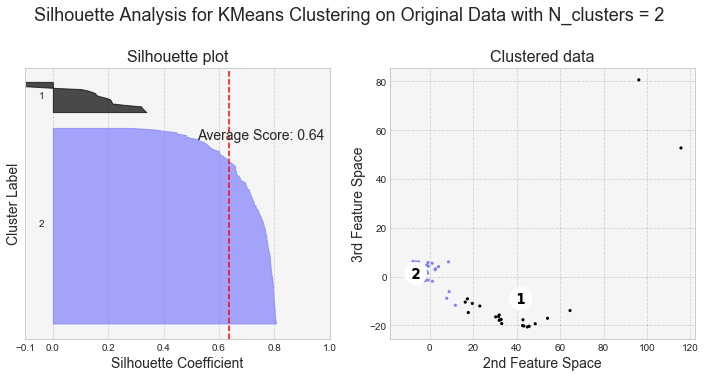

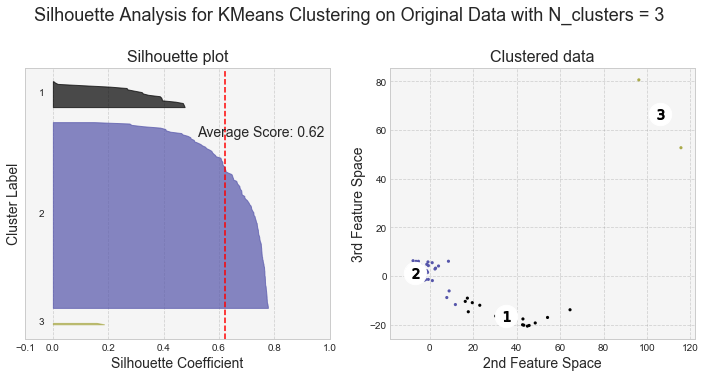

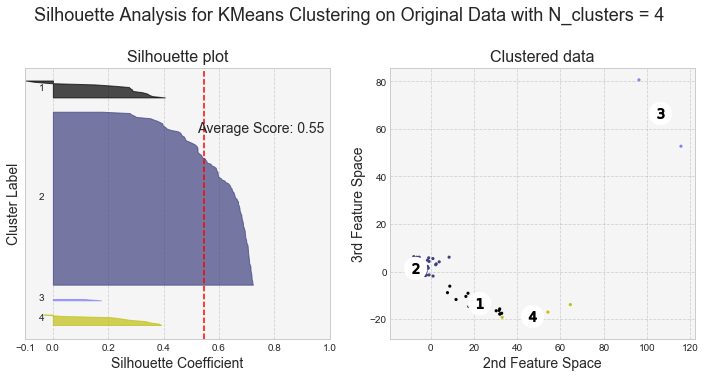

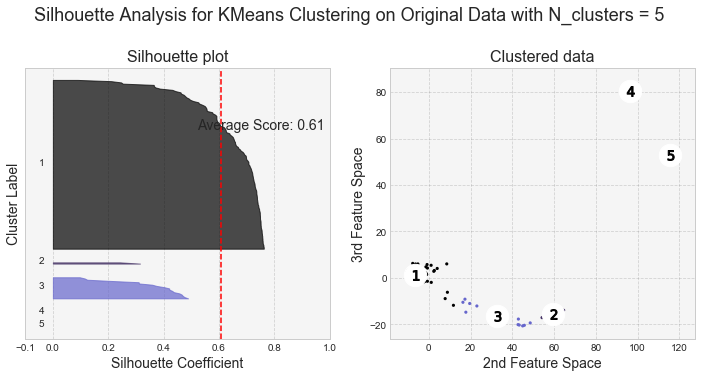

In [43]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

X=xPC 

range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    labels= clusterer.fit(X)
    cluster_labels=labels.labels_


    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.annotate('Average Score: %.2f' % silhouette_avg, xy=(1, 5), xytext=(0.52, 50),\
                 fontsize=14)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.gist_stern(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot",fontsize=16)
    ax1.set_xlabel("Silhouette Coefficient",fontsize=14)
    ax1.set_ylabel("Cluster Label",fontsize=14)
    

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.grid(color='gray', linestyle='--', alpha=.3)
    ax1.invert_yaxis()

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = plt.cm.gist_stern(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=40, lw=0,
                c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=500)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=100,color='k')



    ax2.set_title("Clustered data", fontsize=16)
    ax2.set_xlabel("2nd Feature Space",fontsize=14)
    ax2.set_ylabel("3rd Feature Space",fontsize=14)
    ax2.grid(color='gray', linestyle='--', alpha=.3)

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Original Data "
                  "with N_clusters = %d" % n_clusters),
                 fontsize=18, y=1.05)

    plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, random_state=2)
clusters = kmeans.fit(xPC)

In [45]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [46]:


df_imp['cluster'] = pd.Series(clusters.labels_+1)


In [47]:
df_imp_copy=df_imp.copy(deep=True)

def cluster(cluster):
    if cluster==1:
        return 'G77 & EASTERN BLOCK'
    if cluster==2:
        return 'WESTERN BLOCK'
    else: 
        return 'USA & ISRAEL'
    
df_imp_copy['cluster']=df_imp_copy['cluster'].map(cluster)

In [48]:
# df_imp_copy=df_imp.copy(deep=True)

# def cluster(cluster):
#     if cluster==1:
#         return 'G77 & EASTERN BLOCK'
#     else: 
#         return 'WESTERN BLOCK'
    
# df_imp_copy['cluster']=df_imp_copy['cluster'].map(cluster)

In [49]:
# colors = {"WESTERN BLOCK" : "darkslategrey", "G77 & EASTERN BLOCK" : "midnightblue"}
# liq_list = ["WESTERN BLOCK","G77 & EASTERN BLOCK"]

# df_imp_copy['cluster'].value_counts()

In [50]:
colors = {"USA & ISRAEL":"darkslategrey","WESTERN BLOCK": "darkcyan", "G77 & EASTERN BLOCK": "midnightblue"}
liq_list = ["WESTERN BLOCK","G77 & EASTERN BLOCK","USA & ISRAEL"]

df_imp_copy['cluster'].value_counts()

G77 & EASTERN BLOCK    137
WESTERN BLOCK          20 
USA & ISRAEL           2  
Name: cluster, dtype: int64

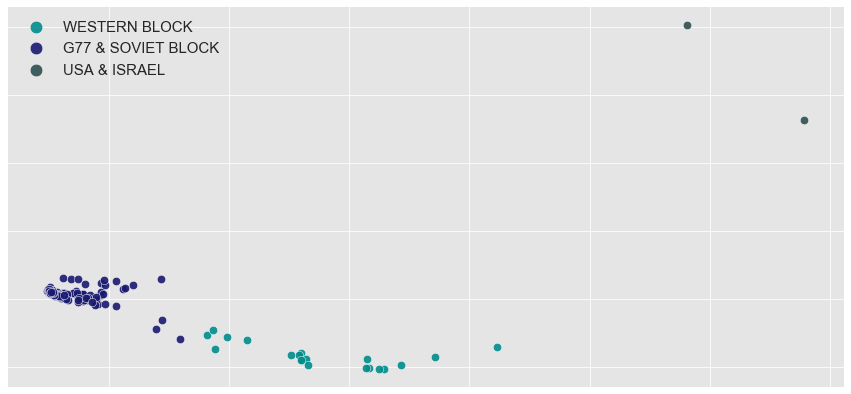

In [51]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
for i in liq_list:
    y = df_imp_copy[df_imp_copy['cluster'] == i]
    ax.scatter(y['PC1'],y['PC2'] , color = colors[i],s=70,\
    label = i, alpha=.9, edgecolor='white')
# plt.title("The Two Major Clusters", y=1.02,fontsize=22,family="serif")   
plt.legend(["WESTERN BLOCK","G77 & SOVIET BLOCK","USA & ISRAEL"],loc='best', fontsize = 15,markerscale=1.5) 

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.show()

In [52]:
df1=df_imp[df_imp['cluster']==1]
df1['country']

0      AFGHANISTAN                     
1      ALBANIA                         
2      ALGERIA                         
3      ANGOLA                          
4      ANTIGUA AND BARBUDA             
5      ARGENTINA                       
8      BAHAMAS                         
9      BAHRAIN                         
10     BANGLADESH                      
11     BARBADOS                        
12     BELARUS                         
14     BELIZE                          
15     BENIN                           
16     BHUTAN                          
17     BOLIVIA                         
18     BOTSWANA                        
19     BRAZIL                          
20     BRUNEI DARUSSALAM               
21     BULGARIA                        
22     BURKINA FASO                    
23     BURUNDI                         
24     CAMBODIA                        
25     CAMEROON                        
27     CAPE VERDE                      
28     CENTRAL AFRICAN REPUBLIC        


In [53]:
df2=df_imp[df_imp['cluster']==2]
df2['country']

6      AUSTRALIA     
7      AUSTRIA       
13     BELGIUM       
26     CANADA        
41     DENMARK       
51     FINLAND       
52     FRANCE        
56     GERMANY       
67     ICELAND       
72     IRELAND       
74     ITALY         
76     JAPAN         
86     LUXEMBOURG    
102    NETHERLANDS   
103    NEW ZEALAND   
107    NORWAY        
116    PORTUGAL      
133    SPAIN         
138    SWEDEN        
147    UNITED KINGDOM
Name: country, dtype: object

In [54]:
df2=df_imp[df_imp['cluster']==3]
df2['country']

73     ISRAEL       
149    UNITED STATES
Name: country, dtype: object

In [55]:
# df0=pd.merge(category, data1, on=['symbol']);
# df0.info()

In [56]:
df1=pd.merge(df_imp, country_code, on=['country'])

df1['country']

0      AFGHANISTAN                     
1      ALBANIA                         
2      ALGERIA                         
3      ANGOLA                          
4      ANTIGUA AND BARBUDA             
5      ARGENTINA                       
6      AUSTRALIA                       
7      AUSTRIA                         
8      BAHAMAS                         
9      BAHRAIN                         
10     BANGLADESH                      
11     BARBADOS                        
12     BELARUS                         
13     BELGIUM                         
14     BELIZE                          
15     BENIN                           
16     BHUTAN                          
17     BOLIVIA                         
18     BOTSWANA                        
19     BRAZIL                          
20     BRUNEI DARUSSALAM               
21     BULGARIA                        
22     BURKINA FASO                    
23     BURUNDI                         
24     CAMBODIA                        


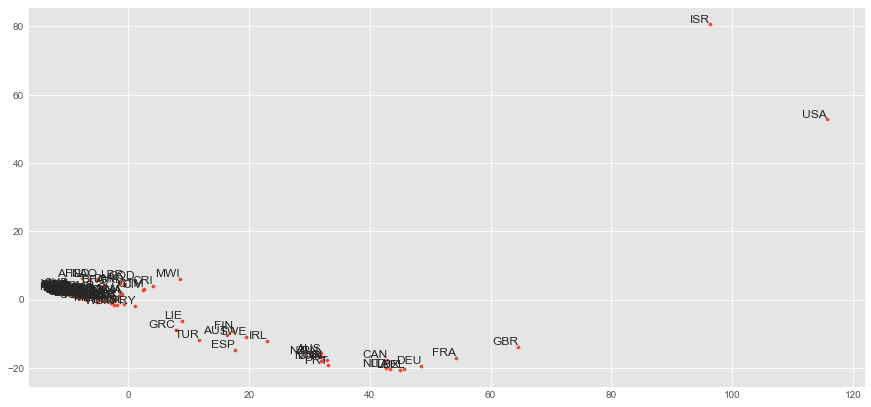

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
plt.style.use('ggplot')


ax.scatter(df_imp_copy['PC1'],df_imp_copy['PC2'] , s=10)
for i, airport in enumerate(df1['a3']):
    ax.annotate(airport, (df_imp_copy.iloc[i].PC1, df_imp_copy.iloc[i].PC2),fontsize=12,ha='right', va='bottom')
# ax.set_title("Annotated Clusters", y=1.05,fontsize=22)
# ax[1].set_xlabel('PC2',fontsize=18,labelpad=1)
# ax[1].set_ylabel('PC1',fontsize=18,labelpad=1)
# ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

In [58]:
# df_=df1[['country', 'cluster']]

In [59]:
# def cluster_name(cluster):
#     if cluster==1:
#         return 'G77 & EASTERN BLOCK'
#     if cluster==2:
#         return 'WESTERN BLOCK'
#     else:
#         return 'USA & ISRAEL'
    
# df_['cluster_name']=df_['cluster'].apply(cluster_name)

In [60]:
# df_merge_b_1991=pd.merge(df_, data0, on=['country'])
# df_merge_b_1991.info()

In [61]:
# df_b_1991=df_merge_b_1991[['code_vote','category','cluster_name']]

# df_b_1991.info()

In [62]:
data_b_1991=df1[['PC1','PC2','country','cluster']]

In [63]:
data_b_1991

,PC1,PC2,country,cluster
0,-7.742057,6.268173,AFGHANISTAN,1
1,-8.191131,0.612661,ALBANIA,1
2,-10.173631,2.203230,ALGERIA,1
3,-9.934297,3.020564,ANGOLA,1
4,-4.345376,1.139234,ANTIGUA AND BARBUDA,1
5,-5.645989,1.955490,ARGENTINA,1
6,31.941754,-15.718864,AUSTRALIA,2
7,16.308155,-10.458381,AUSTRIA,2
8,-1.922220,-1.454090,BAHAMAS,1
9,-9.768574,2.087250,BAHRAIN,1


# CLUSTER AFTER 1991

In [64]:
data0=data1[data1['year']>=1991]

data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226254 entries, 1067 to 551783
Data columns (total 11 columns):
symbol       226254 non-null object
title        226254 non-null object
descr1       226254 non-null object
category     226254 non-null object
year         226254 non-null int64
voted        226254 non-null object
country      226254 non-null object
date         226254 non-null object
a2           226254 non-null object
a3           226254 non-null object
code_vote    226254 non-null int64
dtypes: int64(2), object(9)
memory usage: 20.7+ MB


In [65]:
data=data0[['country', 'code_vote','symbol','year']]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226254 entries, 1067 to 551783
Data columns (total 4 columns):
country      226254 non-null object
code_vote    226254 non-null int64
symbol       226254 non-null object
year         226254 non-null int64
dtypes: int64(2), object(2)
memory usage: 8.6+ MB


In [66]:
# ukrain=data[data['country']=='MOLDOVA']

# ukrain

In [67]:
df=data.groupby(['country', 'symbol'])['code_vote'].aggregate('mean').unstack()
df.reset_index()

symbol,country,A/RES/46/10,A/RES/46/117,A/RES/46/130,A/RES/46/16,A/RES/46/162,A/RES/46/199,A/RES/46/201,A/RES/46/29,A/RES/46/31,...,A/RES/ES-10/17,A/RES/ES-10/19,A/RES/ES-10/2,A/RES/ES-10/3,A/RES/ES-10/4,A/RES/ES-10/5,A/RES/ES-10/6,A/RES/ES-10/7,A/RES/ES-10/8,A/RES/ES-10/9
0,AFGHANISTAN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,ALBANIA,1.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0
2,ALGERIA,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,ANDORRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,ANGOLA,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
5,ANTIGUA AND BARBUDA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0
6,ARGENTINA,1.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,ARMENIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,AUSTRALIA,1.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,AUSTRIA,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [68]:
# df=data0.groupby(['country','resolut'])['code_vote'].aggregate('mean').unstack()
# df.reset_index()



In [73]:
d=df.copy()

d['missing']=d.apply(lambda x: x.count(), axis=1)

d['missing_diff']=d['missing'].apply(lambda x: (x-1356))

d['missing_diff'].sum()/(1356*194)

-0.13992792628409817

In [70]:
# df['missing']

In [162]:
# data_missing=df[df['missing']>300]

# data_missing['missing_diff'].sum()/(1457*194)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, AFGHANISTAN to ZIMBABWE
Columns: 1356 entries, A/RES/46/10 to A/RES/ES-10/9
dtypes: float64(1356)
memory usage: 2.0+ MB


In [163]:
X=df.as_matrix().astype(float)

In [164]:
X_incomplete = X.copy()

In [165]:
knnImpute = KNN(k=11)
X_filled_knn = knnImpute.complete(X_incomplete)

Imputing row 1/194 with 0 missing, elapsed time: 0.214
Imputing row 101/194 with 307 missing, elapsed time: 0.358


In [166]:
# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE,MatrixFactorization

# X_filled_nnm = MatrixFactorization().complete(X_incomplete)

In [167]:
len(X_filled_knn)

194

In [168]:
df_impute=pd.DataFrame(X_filled_knn)

df_impute.head()

,0,1,2,3,4,5,6,7,8,9,...,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355
0,1.000000,1.000000,1.00000,1.0,1.0,0.000000,0.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,0.0,1.0,1.0
1,1.000000,0.000000,-1.00000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.832997,1.0,0.0,0.0,1.0
2,1.000000,1.000000,1.00000,0.0,1.0,1.000000,1.0,1.0,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
3,0.510018,0.173095,-0.65381,1.0,1.0,0.850311,1.0,1.0,0.603093,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
4,1.000000,1.000000,1.00000,1.0,1.0,1.000000,1.0,1.0,0.910726,1.0,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0


In [169]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_impute)

In [170]:
covMat = np.cov(X_scaled.T)


In [171]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [172]:
print (len(eigenValues))
print (len(eigenVectors))

1356
1356


In [173]:
# print (eigenValues)

In [174]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

# print(varExpl)

In [175]:
cvarex = np.cumsum(varExpl);
cvarex[0:30]

array([ 41.16375575+0.j,  60.79047156+0.j,  67.40592117+0.j,
        70.82242839+0.j,  73.13586446+0.j,  74.64936758+0.j,
        76.13194860+0.j,  77.41150502+0.j,  78.58907341+0.j,
        79.64327447+0.j,  80.61716413+0.j,  81.38306805+0.j,
        82.10576937+0.j,  82.70052672+0.j,  83.27169523+0.j,
        83.77751505+0.j,  84.26470429+0.j,  84.72331135+0.j,
        85.16789501+0.j,  85.60124507+0.j,  86.00591800+0.j,
        86.37577158+0.j,  86.73017988+0.j,  87.07836531+0.j,
        87.42089731+0.j,  87.74605920+0.j,  88.04499149+0.j,
        88.33593141+0.j,  88.61730482+0.j,  88.89401120+0.j])

In [176]:
from sklearn.decomposition import PCA 

pcask = PCA(n_components=30)
print (pcask.fit(X_scaled).components_) # See the eigenvectors
xPC = pcask.fit_transform(X_scaled) 

[[-0.02709221 -0.03522436 -0.0317558  ..., -0.02533255 -0.02812435
  -0.02371191]
 [ 0.02415213  0.02263588  0.03216019 ..., -0.00337628 -0.01572686
  -0.03381767]
 [-0.01703091 -0.0094876   0.0011507  ...,  0.02180355  0.03070112
   0.03670971]
 ..., 
 [ 0.02682077  0.01727711  0.01302982 ..., -0.06036428 -0.06268656
  -0.03755549]
 [-0.03903254 -0.00645133 -0.0189869  ...,  0.01191652  0.04526626
   0.0075241 ]
 [ 0.05224395 -0.02821946 -0.0124819  ..., -0.00885917 -0.07270445
  -0.01911304]]


In [177]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',\
                                  'PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22',\
                                 'PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])

PCdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-3.248255,14.347243,9.603354,4.021517,8.094590,2.914660,-1.177025,32.882220,14.834477,12.892388,...,1.850743,-1.105922,-0.704227,0.654605,-1.137400,1.862659,-0.570471,0.348142,-0.062170,0.899031
1,24.843967,-22.782660,-1.202166,0.590099,1.066346,-0.405400,-0.498006,0.629364,0.956759,0.089941,...,0.864911,-2.164573,-2.144377,1.500488,-1.348400,-0.065343,-1.229157,0.207072,1.670520,-2.828381
2,-16.740271,6.293487,4.132737,5.944066,-1.031239,3.116504,-5.825309,1.898133,-5.571643,-2.299966,...,1.938173,0.364222,2.229249,4.958993,-3.063518,1.275904,1.688913,0.623108,1.182984,2.053846
3,21.141868,-23.422341,-1.428438,0.799292,1.354495,0.558272,0.185090,0.687073,-0.039696,-0.168932,...,-1.815171,-1.449473,1.527625,0.712857,0.326179,-0.196009,0.275021,-0.797211,-1.411590,0.496329
4,-14.689208,5.490260,0.875692,-2.712963,-0.009229,-0.267784,-0.014625,1.706366,0.685282,0.263119,...,1.461946,0.859116,-1.055927,-2.322575,2.112400,-3.283036,-0.961076,-1.584068,-2.028328,0.726597


In [178]:

data_imp_reset=df_impute.reset_index()
# data_imp_reset.reset_index()

data_imp_reset.head()

,index,0,1,2,3,4,5,6,7,8,...,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355
0,0,1.000000,1.000000,1.00000,1.0,1.0,0.000000,0.0,1.0,0.000000,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,0.0,1.0,1.0
1,1,1.000000,0.000000,-1.00000,1.0,1.0,1.000000,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,0.832997,1.0,0.0,0.0,1.0
2,2,1.000000,1.000000,1.00000,0.0,1.0,1.000000,1.0,1.0,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
3,3,0.510018,0.173095,-0.65381,1.0,1.0,0.850311,1.0,1.0,0.603093,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
4,4,1.000000,1.000000,1.00000,1.0,1.0,1.000000,1.0,1.0,0.910726,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0


In [179]:
df=df.reset_index()

In [180]:
len(data_imp_reset)

194

In [181]:
# df2 = pd.concat([PCdf, data_reset], axis=1)

df_imp = pd.concat([df['country'],PCdf, data_imp_reset], axis=1)

len(df_imp)

194

In [182]:
df_imp.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355
0,AFGHANISTAN,-3.248255,14.347243,9.603354,4.021517,8.094590,2.914660,-1.177025,32.882220,14.834477,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,0.0,1.0,1.0
1,ALBANIA,24.843967,-22.782660,-1.202166,0.590099,1.066346,-0.405400,-0.498006,0.629364,0.956759,...,1.0,1.0,1.0,1.0,1.0,0.832997,1.0,0.0,0.0,1.0
2,ALGERIA,-16.740271,6.293487,4.132737,5.944066,-1.031239,3.116504,-5.825309,1.898133,-5.571643,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
3,ANDORRA,21.141868,-23.422341,-1.428438,0.799292,1.354495,0.558272,0.185090,0.687073,-0.039696,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
4,ANGOLA,-14.689208,5.490260,0.875692,-2.712963,-0.009229,-0.267784,-0.014625,1.706366,0.685282,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0


In [183]:
from sklearn.cluster import KMeans

distortions2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(xPC)
    distortions2.append(km.inertia_)
dist2 = pd.DataFrame(distortions2)

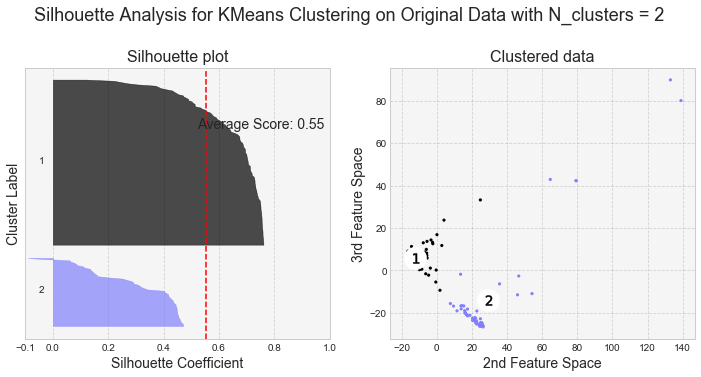

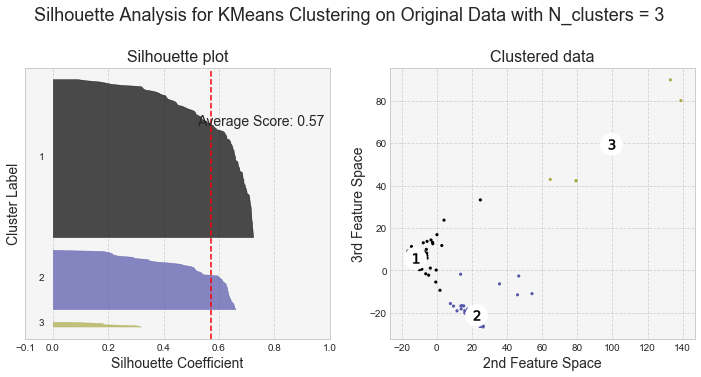

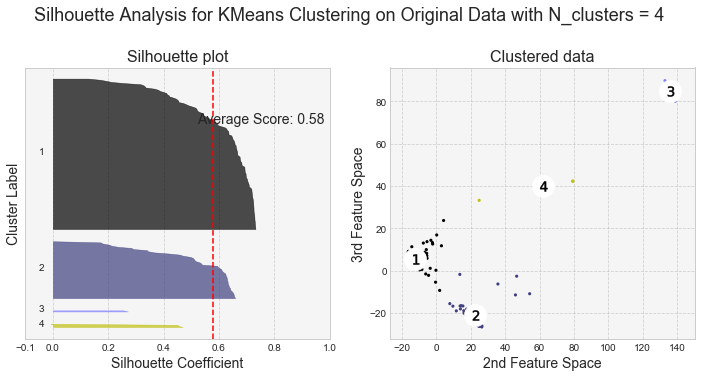

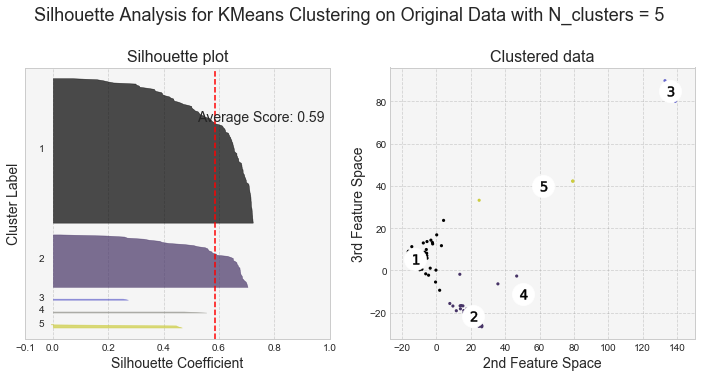

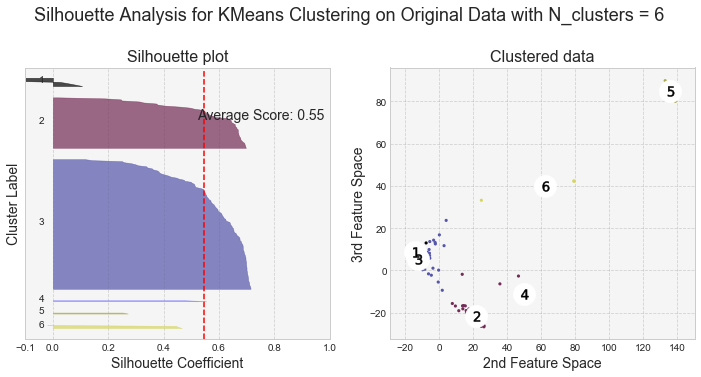

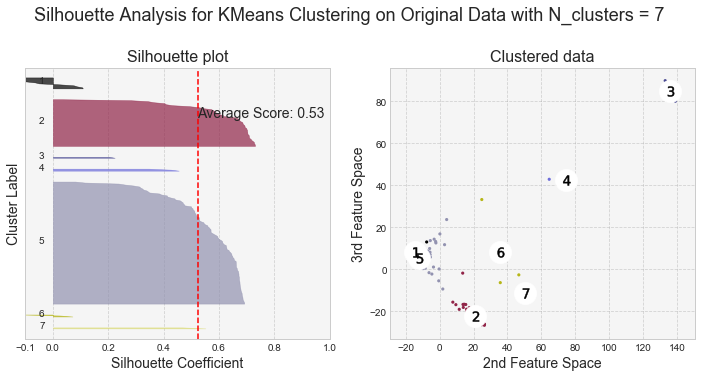

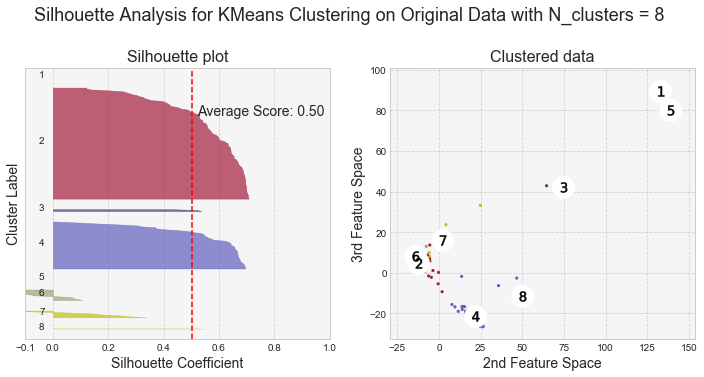

In [184]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

X=xPC 

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    labels= clusterer.fit(X)
    cluster_labels=labels.labels_


    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.annotate('Average Score: %.2f' % silhouette_avg, xy=(1, 5), xytext=(0.52, 50),\
                 fontsize=14)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.gist_stern(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot",fontsize=16)
    ax1.set_xlabel("Silhouette Coefficient",fontsize=14)
    ax1.set_ylabel("Cluster Label",fontsize=14)
    

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.grid(color='gray', linestyle='--', alpha=.3)
    ax1.invert_yaxis()

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = plt.cm.gist_stern(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=40, lw=0,
                c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=500)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=100,color='k')



    ax2.set_title("Clustered data", fontsize=16)
    ax2.set_xlabel("2nd Feature Space",fontsize=14)
    ax2.set_ylabel("3rd Feature Space",fontsize=14)
    ax2.grid(color='gray', linestyle='--', alpha=.3)

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Original Data "
                  "with N_clusters = %d" % n_clusters),
                 fontsize=18, y=1.05)

    plt.show()

In [185]:
kmeans = KMeans(n_clusters=4,random_state=2)
clusters = kmeans.fit(xPC)

In [186]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [187]:


df_imp['cluster'] = pd.Series(clusters.labels_+1)

In [188]:
df_imp_copy=df_imp.copy(deep=True)

def cluster(cluster):
    if cluster==1:
        return 'WESTERN & EASTERN BLOCKS'
    if cluster==2:
        return 'USA & ISRAEL'
    if cluster==3:
        return 'PACIFIC ISLANDS'
    else: 
        return 'G77'
    
df_imp_copy['cluster']=df_imp_copy['cluster'].map(cluster)

In [189]:
colors = {"USA & ISRAEL":"darkslategrey","WESTERN & EASTERN BLOCKS": "darkcyan","PACIFIC ISLANDS": "darkmagenta", "G77": "midnightblue"}
liq_list = ["WESTERN & EASTERN BLOCKS","G77","USA & ISRAEL","PACIFIC ISLANDS"]

df_imp_copy['cluster'].value_counts()

G77                         136
WESTERN & EASTERN BLOCKS    52 
PACIFIC ISLANDS             4  
USA & ISRAEL                2  
Name: cluster, dtype: int64

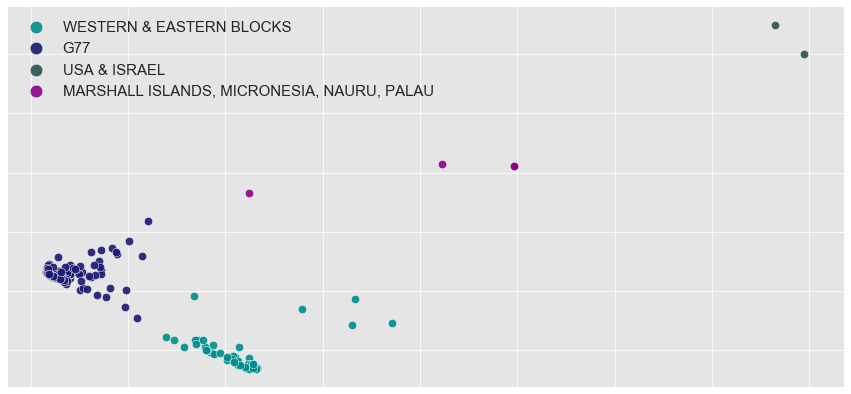

In [190]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,7))
for i in liq_list:
    y = df_imp_copy[df_imp_copy['cluster'] == i]
    ax.scatter(y['PC1'],y['PC2'] , color = colors[i],s=70,\
    label = i, alpha=.9, edgecolor='white')
# plt.title("The Two Major Clusters", y=1.02,fontsize=22,family="serif")   
plt.legend(["WESTERN & EASTERN BLOCKS","G77","USA & ISRAEL","MARSHALL ISLANDS, MICRONESIA, NAURU, PALAU"],loc='best', fontsize = 15,markerscale=1.5) 

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.show()

In [191]:
df1=df_imp[df_imp['cluster']==1]
df1['country']

1      ALBANIA                                  
3      ANDORRA                                  
8      AUSTRALIA                                
9      AUSTRIA                                  
16     BELGIUM                                  
21     BOSNIA AND HERZEGOVINA                   
25     BULGARIA                                 
30     CANADA                                   
41     CROATIA                                  
43     CYPRUS                                   
44     CZECHIA                                  
46     DENMARK                                  
55     ESTONIA                                  
58     FINLAND                                  
59     FRANCE                                   
62     GEORGIA                                  
63     GERMANY                                  
65     GREECE                                   
73     HUNGARY                                  
74     ICELAND                                  
79     IRELAND      

In [192]:
df2=df_imp[df_imp['cluster']==2]
df2['country']

80     ISRAEL       
184    UNITED STATES
Name: country, dtype: object

In [193]:
df3=df_imp[df_imp['cluster']==3]
df3['country']

105    MARSHALL ISLANDS               
109    MICRONESIA, FEDERATED STATES OF
118    NAURU                          
129    PALAU                          
Name: country, dtype: object

In [194]:
df4=df_imp[df_imp['cluster']==4]
df4['country']

0      AFGHANISTAN                     
2      ALGERIA                         
4      ANGOLA                          
5      ANTIGUA AND BARBUDA             
6      ARGENTINA                       
7      ARMENIA                         
10     AZERBAIJAN                      
11     BAHAMAS                         
12     BAHRAIN                         
13     BANGLADESH                      
14     BARBADOS                        
15     BELARUS                         
17     BELIZE                          
18     BENIN                           
19     BHUTAN                          
20     BOLIVIA                         
22     BOTSWANA                        
23     BRAZIL                          
24     BRUNEI DARUSSALAM               
26     BURKINA FASO                    
27     BURUNDI                         
28     CAMBODIA                        
29     CAMEROON                        
31     CAPE VERDE                      
32     CENTRAL AFRICAN REPUBLIC        


In [195]:
# df0=pd.merge(category, data1, on=['symbol']);
# df0.info()

In [196]:
df1=pd.merge(df_imp, country_code, on=['country'])

df1['country']

0      AFGHANISTAN                              
1      ALBANIA                                  
2      ALGERIA                                  
3      ANDORRA                                  
4      ANGOLA                                   
5      ANTIGUA AND BARBUDA                      
6      ARGENTINA                                
7      ARMENIA                                  
8      AUSTRALIA                                
9      AUSTRIA                                  
10     AZERBAIJAN                               
11     BAHAMAS                                  
12     BAHRAIN                                  
13     BANGLADESH                               
14     BARBADOS                                 
15     BELARUS                                  
16     BELGIUM                                  
17     BELIZE                                   
18     BENIN                                    
19     BHUTAN                                   
20     BOLIVIA      

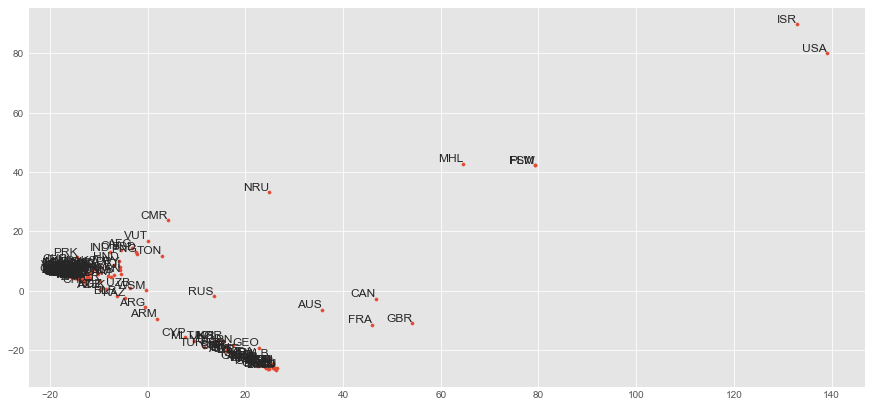

In [197]:
fig, ax = plt.subplots(figsize=(15,7))
plt.style.use('ggplot')


ax.scatter(df_imp_copy['PC1'],df_imp_copy['PC2'] , s=10)
for i, airport in enumerate(df1['a3']):
    ax.annotate(airport, (df_imp_copy.iloc[i].PC1, df_imp_copy.iloc[i].PC2),fontsize=12,ha='right', va='bottom')
# ax.set_title("Annotated Clusters", y=1.05,fontsize=22)
# ax[1].set_xlabel('PC2',fontsize=18,labelpad=1)
# ax[1].set_ylabel('PC1',fontsize=18,labelpad=1)
# ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

In [201]:
data_a_1991=df1[['PC1','PC2','country','cluster']]

In [199]:
data_b_1991.columns=['PC1_b_1991','PC2_b_1991','country','cluster_b_1991']

In [202]:
data_a_1991.columns=['PC1_a_1991','PC2_a_1991','country','cluster_a_1991']

In [206]:
data_greg1=pd.merge(data_b_1991, data_a_1991,how='outer')

In [211]:
data_greg2=pd.merge(data_greg1,country_code[['country','a3']], on=['country']);
data_greg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 8 columns):
PC1_b_1991        159 non-null float64
PC2_b_1991        159 non-null float64
country           197 non-null object
cluster_b_1991    159 non-null float64
PC1_a_1991        194 non-null float64
PC2_a_1991        194 non-null float64
cluster_a_1991    194 non-null float64
a3                197 non-null object
dtypes: float64(6), object(2)
memory usage: 13.9+ KB


In [204]:
data_greg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 7 columns):
PC1_b_1991        159 non-null float64
PC2_b_1991        159 non-null float64
country           197 non-null object
cluster_b_1991    159 non-null float64
PC1_a_1991        194 non-null float64
PC2_a_1991        194 non-null float64
cluster_a_1991    194 non-null float64
dtypes: float64(6), object(1)
memory usage: 12.3+ KB


In [212]:
data_greg2.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART3/data_frame_greg3.csv", index=False)

In [146]:
df_=df1[['country', 'cluster']]

In [109]:
def cluster_name(cluster):
    if cluster==1:
        return 'G77'
    if cluster==3:
        return 'WESTERN & EASTERN BLOCKS'
    if cluster==2:
        return 'PACIFIC ISLANDS'
    else:
        return 'USA & ISRAEL'
df_['cluster_name']=df_['cluster'].apply(cluster_name)

/Users/uncontract/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [110]:
df_merge_a_1991=pd.merge(df_, data0, on=['country'])
df_merge_a_1991.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218314 entries, 0 to 218313
Data columns (total 14 columns):
country         218314 non-null object
cluster         218314 non-null int32
cluster_name    218314 non-null object
resolut         218314 non-null object
descr           218314 non-null object
vote            218314 non-null object
descr1          218314 non-null object
category        218314 non-null object
a2              218314 non-null object
a3              218314 non-null object
voted           218314 non-null object
date            218314 non-null object
code_vote       218314 non-null int64
year            218314 non-null int64
dtypes: int32(1), int64(2), object(11)
memory usage: 24.2+ MB


In [111]:
df_a_1991=df_merge_a_1991[['code_vote','category','cluster_name']]

df_a_1991.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218314 entries, 0 to 218313
Data columns (total 3 columns):
code_vote       218314 non-null int64
category        218314 non-null object
cluster_name    218314 non-null object
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


In [112]:
data1=data2.query('category == ["Law of the sea","Decolonization","Nuclear Disarmament","Universal Human Rights","Middle East","Arm Race in Space","Racial Discrimination"]')

In [113]:
# df_a_1991, df_b_1991

In [114]:
df_a=df_a_1991.query('category == ["Law of the sea","Decolonization","Nuclear Disarmament",\
"Universal Human Rights","Middle East","Arm Race in Space","Racial Discrimination"]')

In [115]:
a_1991=df_a.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
a_1991.reset_index(inplace=True)
a_1991

cluster_name,category,G77,PACIFIC ISLANDS,USA & ISRAEL,WESTERN & EASTERN BLOCKS
0,Arm Race in Space,0.996481,0.866667,-0.060606,0.929652
1,Decolonization,0.957037,0.508772,-0.648402,0.336816
2,Law of the sea,0.953922,1.000000,0.846154,0.931765
3,Middle East,0.932636,-0.509030,-0.861249,0.738272
4,Nuclear Disarmament,0.944469,0.465259,-0.199762,0.342181
5,Racial Discrimination,0.958948,-0.227848,-0.485714,0.164392
6,Universal Human Rights,0.937471,-0.292784,-0.720930,-0.320447


In [116]:
df_b=df_b_1991.query('category == ["Law of the sea","Decolonization","Nuclear Disarmament",\
"Universal Human Rights","Middle East","Arm Race in Space","Racial Discrimination"]')

In [117]:
b_1991=df_b.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
b_1991.reset_index(inplace=True)
b_1991

cluster_name,category,G77 & EASTERN BLOCK,USA & ISRAEL,WESTERN BLOCK
0,Arm Race in Space,0.968623,0.187500,0.842262
1,Decolonization,0.963122,-0.686275,-0.004232
2,Law of the sea,0.960536,-0.444444,0.582329
3,Middle East,0.945770,-0.770758,0.474355
4,Nuclear Disarmament,0.900463,-0.191554,0.289126
5,Racial Discrimination,0.977821,-0.546512,0.331987
6,Universal Human Rights,0.920258,-0.273381,0.312081


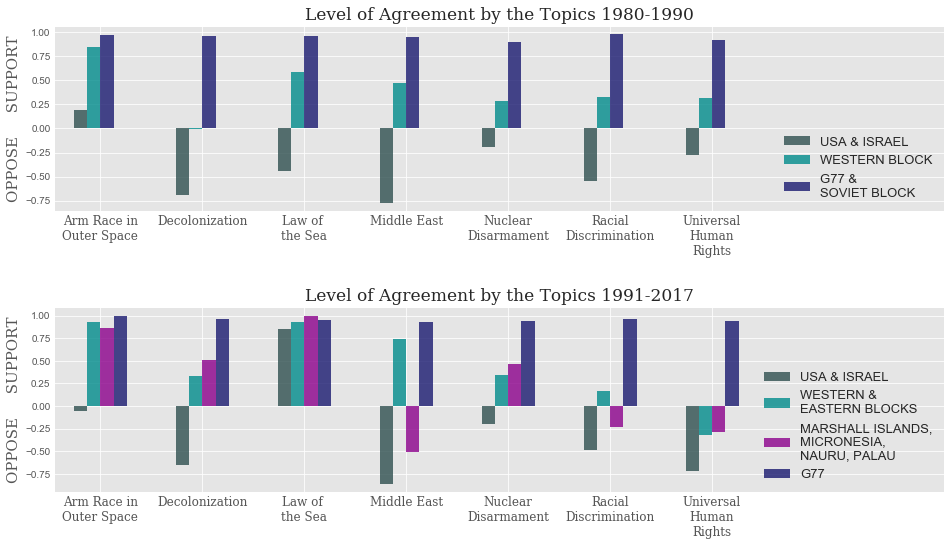

In [125]:
plt.style.use('ggplot')


fig, ax = plt.subplots(2,1, figsize=(13,7))
plt.tight_layout(h_pad=8)

pos = np.arange(len(b_1991['WESTERN BLOCK']))
width = .13

X = np.arange(5)



ax[0].bar(pos,
        b_1991['USA & ISRAEL'],
        width,
        color='darkslategrey', alpha=.8)
ax[0].bar(pos+width,
        b_1991['WESTERN BLOCK'],
        width,
        color='darkcyan', alpha=.8)
ax[0].bar(pos+2*width,
        b_1991['G77 & EASTERN BLOCK'],
        width,
        color='midnightblue', alpha=.8)

ax[0].set_ylabel('OPPOSE     SUPPORT', fontsize=15,family="serif")
ax[0].set_xticks([p + 1.5*width for p in pos])
ax[0].set_xlim(min(pos)-2*width, max(pos)+width*19)
ax[0].legend(['USA & ISRAEL','WESTERN BLOCK','G77 &\nSOVIET BLOCK'], loc='lower right', fontsize=13)
ax[0].set_title('Level of Agreement by the Topics 1980-1990', fontsize=17,family="serif")

ax[0].set_xticklabels(['Arm Race in\nOuter Space','Decolonization','Law of \nthe Sea','Middle East','Nuclear\nDisarmament',\
                   'Racial\nDiscrimination','Universal\nHuman\nRights'], size =12,family="serif")
 



ax[1].bar(pos,
        a_1991['USA & ISRAEL'],
        width,
        color='darkslategrey', alpha=.8)

ax[1].bar(pos+width,
        a_1991['WESTERN & EASTERN BLOCKS'],
        width,
        color='darkcyan', alpha=.8)

ax[1].bar(pos+2*width,
        a_1991['PACIFIC ISLANDS'],
        width,
        color='darkmagenta', alpha=.8)

ax[1].bar(pos+3*width,
        a_1991['G77'],
        width,
        color='midnightblue',alpha=.8)


ax[1].set_ylabel('OPPOSE     SUPPORT', fontsize=15,family="serif")
 
ax[1].set_xticks([p + 1.5*width for p in pos])
ax[1].set_xticklabels(['Arm Race in\nOuter Space','Decolonization','Law of \nthe Sea','Middle East','Nuclear\nDisarmament',\
                   'Racial\nDiscrimination','Universal\nHuman\nRights'], size =12,family="serif")

ax[1].set_xlim(min(pos)-2*width, max(pos)+width*19)
ax[1].legend(['USA & ISRAEL','WESTERN &\nEASTERN BLOCKS','MARSHALL ISLANDS,\nMICRONESIA,\nNAURU, PALAU','G77'], loc='lower right', fontsize=13)
ax[1].set_title('Level of Agreement by the Topics 1991-2017', fontsize=17,family="serif")


plt.show()

In [ ]:
df_a_1991=df_merge_a_1991[['code_vote','category','cluster_name']]

df_a_1991.info()

In [1182]:
df_a_1991=df_merge_a_1991[['code_vote','category','cluster_name']]

df_a_1991.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202763 entries, 0 to 202762
Data columns (total 3 columns):
code_vote       202763 non-null int64
category        202763 non-null object
cluster_name    202763 non-null object
dtypes: int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
data1=data2.query('category == ["Law of the sea","Assistance to Palestinian Refugees","Decolonization",\
"Disarmament","Universal Human Rights","Israeli Occupation",\
"Middle East","Status of Jerusalem","Arm Race in Outer Space","Racial Discrimination"]')

In [ ]:
df_a_1991, df_b_1991

In [1186]:
df_a=df_a_1991.query('category == ["Disarmament","Arm Race in Outer Space",\
"Racial Discrimination","Universal Human Rights","Decolonization", "Law of the sea"]')

In [1206]:
a_1991=df_a.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
a_1991.reset_index(inplace=True)
a_1991

cluster_name,category,DEVELOPING WORLD,PACIFIC ISLANDS,USA & ISRAEL,WESTERN/EASTERN EUROPE
0,Arm Race in Outer Space,0.996489,0.850000,-0.060606,0.929652
1,Decolonization,0.957033,0.461165,-0.648402,0.336816
2,Disarmament,0.944398,0.394924,-0.199762,0.342181
3,Law of the sea,0.954131,1.000000,0.846154,0.931765
4,Racial Discrimination,0.957452,-0.343284,-0.485714,0.164392
5,Universal Human Rights,0.936661,-0.475610,-0.720930,-0.320447


In [1192]:
df_b=df_b_1991.query('category == ["Disarmament","Arm Race in Outer Space",\
"Racial Discrimination","Universal Human Rights","Decolonization", "Law of the sea"]')

In [236]:
b_1991=df_b.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
b_1991.reset_index(inplace=True)
b_1991

cluster_name,category,G77 & EASTERN BLOCK,USA & ISRAEL,WESTERN BLOCK
0,Arm Race in Space,0.996481,0.888469,0.866667
1,Decolonization,0.957037,0.294510,0.508772
2,Law of the sea,0.953922,0.928410,1.000000
3,Middle East,0.932636,0.670449,-0.509030
4,Nuclear Disarmament,0.944469,0.319708,0.465259
5,Racial Discrimination,0.958948,0.137337,-0.227848
6,Universal Human Rights,0.937471,-0.336870,-0.292784


# PLOTTING DIFFERENCES

In [ ]:
data1=data2.query('category == ["Law of the sea","Assistance to Palestinian Refugees","Decolonization",\
"Disarmament","Universal Human Rights","Israeli Occupation",\
"Middle East","Status of Jerusalem","Arm Race in Outer Space","Racial Discrimination"]')

In [1235]:
# df_a_1991, df_b_1991

In [1257]:
df_a=df_a_1991.query('category == ["Assistance to Palestinian Refugees","Middle East","Israeli Occupation"]')

In [1258]:
a_1991=df_a.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
a_1991.reset_index(inplace=True)
a_1991

cluster_name,category,DEVELOPING WORLD,PACIFIC ISLANDS,USA & ISRAEL,WESTERN/EASTERN EUROPE
0,Assistance to Palestinian Refugees,0.947486,-0.508632,-0.870279,0.772102
1,Israeli Occupation,0.832128,-0.292035,-0.875000,0.374818
2,Middle East,0.905705,-0.447368,-0.727273,0.792453


In [1259]:
df_b=df_b_1991.query('category == ["Assistance to Palestinian Refugees","Middle East",\
"Israeli Occupation"]')

df_b_1991['category'].value_counts()

Disarmament                           48748
Assistance to Palestinian Refugees    24097
Decolonization                        11379
Israeli Occupation                    11226
Universal Human Rights                10307
Racial Discrimination                 8538 
Middle East                           4620 
Law of the sea                        2877 
Arm Race in Outer Space               2344 
Name: category, dtype: int64

In [1260]:
b_1991=df_b.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
b_1991.reset_index(inplace=True)
b_1991

cluster_name,category,DEVELOPED WORLD,DEVELOPING WORLD,USA & ISRAEL
0,Assistance to Palestinian Refugees,0.466305,0.971176,-0.787425
1,Israeli Occupation,0.734719,0.948802,-0.698718
2,Middle East,-0.117560,0.805870,-0.859375


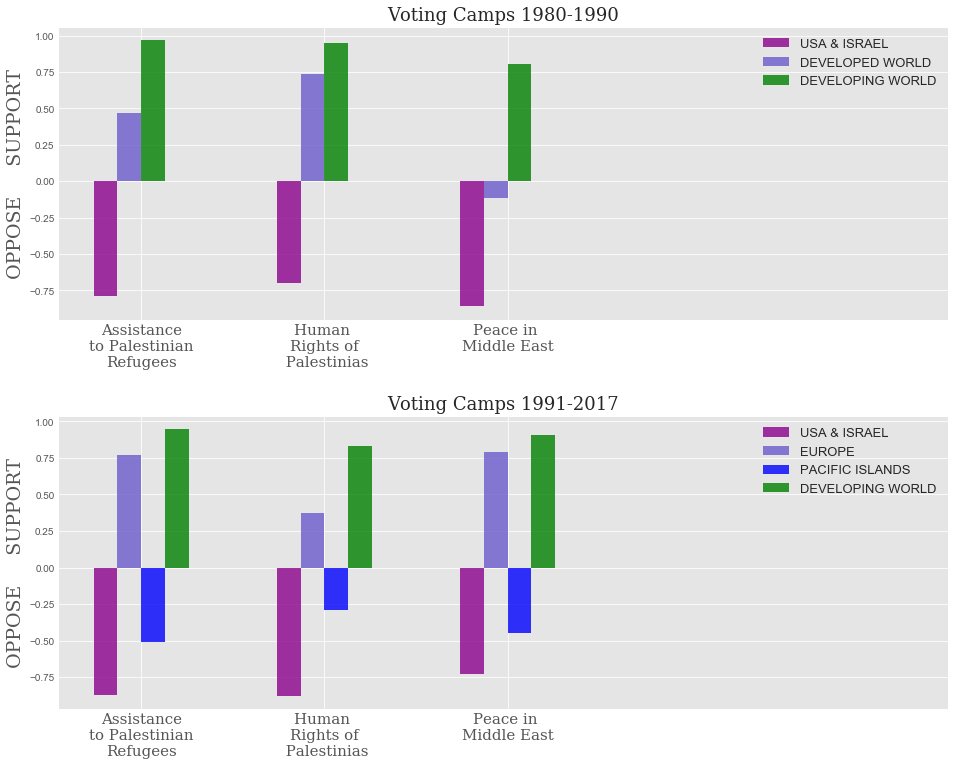

In [1261]:
plt.style.use('ggplot')


fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=8)

pos = np.arange(len(b_1991['DEVELOPING WORLD']))
width = .13

X = np.arange(5)



ax[0].bar(pos,
        b_1991['USA & ISRAEL'],
        width,
        color='darkmagenta', alpha=.8)
ax[0].bar(pos+width,
        b_1991['DEVELOPED WORLD'],
        width,
        color='slateblue', alpha=.8)
ax[0].bar(pos+2*width,
        b_1991['DEVELOPING WORLD'],
        width,
        color='green', alpha=.8)

ax[0].set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
ax[0].set_xticks([p + 1.5*width for p in pos])
ax[0].set_xlim(min(pos)-2*width, max(pos)+width*20)
ax[0].legend(['USA & ISRAEL','DEVELOPED WORLD','DEVELOPING WORLD'], loc='upper right', fontsize=13)
ax[0].set_title('Voting Camps 1980-1990', fontsize=18,family="serif")
# ax[0].set_xticklabels(['Assistance\nto Palestinian\nRefugees','Human \nRights of\n Palestinias','Peace in \nMiddle East'], size =15,family="serif")

 



ax[1].bar(pos,
        a_1991['USA & ISRAEL'],
        width,
        color='darkmagenta', alpha=.8)

ax[1].bar(pos+width,
        a_1991['WESTERN/EASTERN EUROPE'],
        width,
        color='slateblue', alpha=.8)

ax[1].bar(pos+2*width,
        a_1991['PACIFIC ISLANDS'],
        width,
        color='blue', alpha=.8)

ax[1].bar(pos+3*width,
        a_1991['DEVELOPING WORLD'],
        width,
        color='green',alpha=.8)


ax[1].set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
ax[1].set_xticks([p + 1.5*width for p in pos])
ax[1].set_xticklabels(['Assistance\nto Palestinian\nRefugees','Human \nRights of\n Palestinias','Peace in \nMiddle East'], size =15,family="serif")

ax[1].set_xlim(min(pos)-2*width, max(pos)+width*20)
ax[1].legend(['USA & ISRAEL','EUROPE','PACIFIC ISLANDS','DEVELOPING WORLD'], loc='upper right', fontsize=13)
ax[1].set_title('Voting Camps 1991-2017', fontsize=18,family="serif")


plt.show()

In [1262]:
df_a=df_a_1991.query('category == ["Disarmament","Arm Race in Outer Space",\
"Racial Discrimination","Universal Human Rights","Decolonization", "Law of the sea"]')

In [1263]:
a_1991=df_a.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
a_1991.reset_index(inplace=True)
a_1991

cluster_name,category,DEVELOPING WORLD,PACIFIC ISLANDS,USA & ISRAEL,WESTERN/EASTERN EUROPE
0,Arm Race in Outer Space,0.996489,0.850000,-0.060606,0.929652
1,Decolonization,0.957033,0.461165,-0.648402,0.336816
2,Disarmament,0.944398,0.394924,-0.199762,0.342181
3,Law of the sea,0.954131,1.000000,0.846154,0.931765
4,Racial Discrimination,0.957452,-0.343284,-0.485714,0.164392
5,Universal Human Rights,0.936661,-0.475610,-0.720930,-0.320447


In [1264]:
df_b=df_b_1991.query('category == ["Disarmament","Arm Race in Outer Space",\
"Racial Discrimination","Universal Human Rights","Decolonization", "Law of the sea"]')

In [1265]:
b_1991=df_b.groupby(['category','cluster_name'])['code_vote'].aggregate('mean').unstack()
b_1991.reset_index(inplace=True)
b_1991

cluster_name,category,DEVELOPED WORLD,DEVELOPING WORLD,USA & ISRAEL
0,Arm Race in Outer Space,0.842262,0.968623,0.187500
1,Decolonization,-0.004232,0.963122,-0.686275
2,Disarmament,0.289126,0.900463,-0.191554
3,Law of the sea,0.582329,0.960536,-0.444444
4,Racial Discrimination,0.331987,0.977821,-0.546512
5,Universal Human Rights,0.312081,0.920258,-0.273381


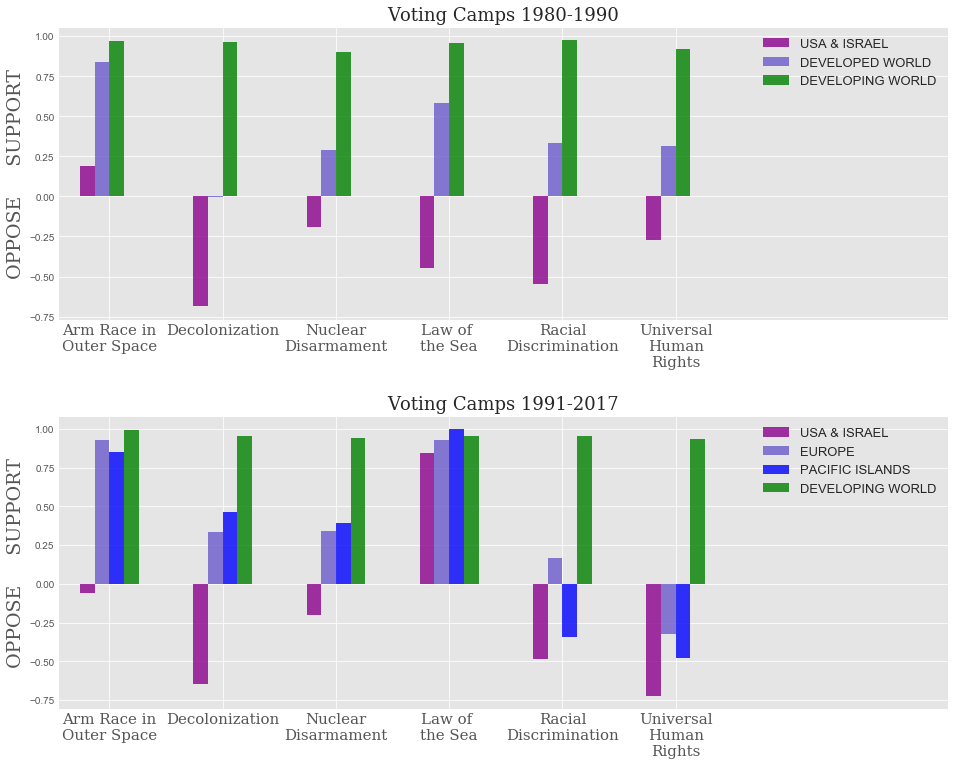

In [1266]:
plt.style.use('ggplot')


fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=8)

pos = np.arange(len(b_1991['DEVELOPING WORLD']))
width = .13

X = np.arange(5)



ax[0].bar(pos,
        b_1991['USA & ISRAEL'],
        width,
        color='darkmagenta', alpha=.8)
ax[0].bar(pos+width,
        b_1991['DEVELOPED WORLD'],
        width,
        color='slateblue', alpha=.8)
ax[0].bar(pos+2*width,
        b_1991['DEVELOPING WORLD'],
        width,
        color='green', alpha=.8)

ax[0].set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
ax[0].set_xticks([p + 1.5*width for p in pos])
ax[0].set_xlim(min(pos)-2*width, max(pos)+width*20)
ax[0].legend(['USA & ISRAEL','DEVELOPED WORLD','DEVELOPING WORLD'], loc='upper right', fontsize=13)
ax[0].set_title('Voting Camps 1980-1990', fontsize=18,family="serif")
ax[0].set_xticklabels(['Arm Race in\nOuter Space','Decolonization','Nuclear\nDisarmament',\
                    'Law of \nthe Sea','Racial\nDiscrimination','Universal\nHuman\nRights'], size =15,family="serif")

 



ax[1].bar(pos,
        a_1991['USA & ISRAEL'],
        width,
        color='darkmagenta', alpha=.8)

ax[1].bar(pos+width,
        a_1991['WESTERN/EASTERN EUROPE'],
        width,
        color='slateblue', alpha=.8)

ax[1].bar(pos+2*width,
        a_1991['PACIFIC ISLANDS'],
        width,
        color='blue', alpha=.8)

ax[1].bar(pos+3*width,
        a_1991['DEVELOPING WORLD'],
        width,
        color='green',alpha=.8)


ax[1].set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
ax[1].set_xticks([p + 1.5*width for p in pos])
ax[1].set_xticklabels(['Arm Race in\nOuter Space','Decolonization','Nuclear\nDisarmament',\
                    'Law of \nthe Sea','Racial\nDiscrimination','Universal\nHuman\nRights'], size =15,family="serif")
ax[1].set_xlim(min(pos)-2*width, max(pos)+width*20)
ax[1].legend(['USA & ISRAEL','EUROPE','PACIFIC ISLANDS','DEVELOPING WORLD'], loc='upper right', fontsize=13)
ax[1].set_title('Voting Camps 1991-2017', fontsize=18,family="serif")


plt.show()